# 이항분류함수
- 머신러닝, 딥러닝은 y값에 따라 예측, 분류를 실행함
- 예측 : y레이블(종속변수)의 결과가 한가지의 무한대의 숫자값
- 분류(이항, 다항분류) : y레이블이 범주형 데이터인 경우 사용됨
    - 이항분류 : y레이블(종속변수)의 결과가 두 가지의 분류 결과만 나옴
    - 다항분류 : y레이블(종속변수)의 결과가 세 가지 이상의 분류가 나옴<br>
<br>

- 사이킷런 ML에서 참고
    - 로지스틱(로짓)회귀분석에서 결과값이 0 또는 1로 나오게 하면 분류
    - 로지스틱(로짓)회귀분석에서 결과값이 0~1사이로 나오게 하면 회귀

- 로지스틱 회귀분석 모형<br>
$ ln(\frac{P}{1-P}) = a+bX $<br>
<br>
$\frac{p}{1-P} = e^{a+bX}$<br>
<br>
$P = \frac{e^{a+bX}}{1+e^{a+bX}}$

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
x = [12, 3, 4, 3]
y = ['생존', '생존', '사망', '생존'] # y값을 숫자로 변환해야 함, unique명령을 사용하여 결과가 두 가지 경우만 나오는지 확인

# 레벨인코딩 함수로 작업해도 됨, 단 레벨인코딩은 ㄱ,ㄴ,ㄷ 순서대로 0,1,..가 부여됨
y_label = []
for i in y:
    if i=='생존':
        y_label.append(1)
    else:
        y_label.append(0)
print('\n--테스트-실제값--- ')
print(y_label)

x = np.array(x)

# x값을 넣었을 때 수식계산의 결과가 0과1사이에 나올 수 있도록 하는 여러가지 함수에서 골라서 사용함.

y_hat = 1/(1+np.exp(-x)) # 시그모이드 함수 사용, w,b값을 계산하고, 0~1사이값이 나올 수 있는 계산식이어야 함(딥러닝)
# 만약에 y_hat이 최종값이면 이 값을 0과 1로 제작해야만 실제 y값하고 비교가 가능 => 임계구역(사용자가 정의)이상인지 아닌지에 따라 0과 1로 다시 값을 부여
y_hat_result = []
for i in y_hat:
    if i>0.5: # 0.5를 임계구역이라고 함. 임계구역은 사용자가 정함
        y_hat_result.append(1)
    else:
        y_hat_result.append(0)
print('---테스트-예측값--- ')
y_hat_result


--테스트-실제값--- 
[1, 1, 0, 1]
---테스트-예측값--- 


[1, 1, 1, 1]

- 이항분류에서는 미리 자료값을 같은 범위로 만드는 스케일링을 진행하고 작업하는것을 권장함.
- 이항분류에서는 실제값하고 예측값하고의 일치율을 계산함.(4가지 경우를 계산)
    - y값이 1, y예측값이 1
    - y값이 1, y예측값이 0
    - y값이 0, y예측값이 1
    - y값이 0, y예측값이 0

- 이원분류표

|||y예측(Predicted)||
|------|---|---||
|||1(True)|0(False)|
|y(Observed)|1(True)|TT(TP)|TF(FN)|
||0(False)|FT(FP)|FF(TN)|


In [6]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

x = [12,3,4,3]
sigmoid(np.array(x))

array([0.99999386, 0.95257413, 0.98201379, 0.95257413])

In [9]:
# 참고
# argmax : 자료 중 가장 큰 값이 있는 위치값 리턴
# 예를들어서 y_hat이 선호색상에 대한 거라면

a=[0.00003, 0.000007, 0.00002, 0.99999, 0.00002]
y_hat_label=['빨강','파랑','초록','검정','흰색']
y_hat_label[np.argmax(a)]

'검정'

## 로지스틱 회귀분석
- https://wikidocs.net/41256

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 데이터 로드
x_data = np.array([
    [2, 1],
    [3, 2],
    [3, 4],
    [5, 5],
    [7, 5],
    [2, 5],
    [8, 9],
    [9, 10],
    [6, 12],
    [9, 2],
    [6, 10],
    [2, 4]
])
y_data = np.array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0])

labels = ['fail', 'pass']

- 모델 분석

In [7]:
# 데이터 전처리
x_train, x_test, y_train, y_test = train_test_split(
    x_data, y_data, test_size=0.3, random_state=777, stratify=y_data)

In [9]:
# 모델 생성
model = LogisticRegression()

# 모델 학습
model.fit(x_train,y_train)

# 모델 예측 및 검증
y_predict = model.predict(x_test)

print('---테스트-예측값--- ')
print(y_predict)  


print('\n--테스트-실제값--- ')
print(y_test)  


print('\n--테스트데이터 정확도--- ')
print(accuracy_score(y_test, y_predict))

---테스트-예측값--- 
[1 1 0 0]

--테스트-실제값--- 
[1 1 0 0]

--테스트데이터 정확도--- 
1.0


In [10]:
y_predict = model.predict_proba(x_test) # predict_proba() 함수 : 데이터의 class가 아닌 예측된 확률을 얻고자 할 때 사용
print(y_predict) # fail일 확률과 pass일 확률을 출력

print('\n\n--xtest값--')
print(x_test)

print('\n\n--- 각 테스트값별 예측확률 ---')
for i in y_predict:
    confidence = i[i.argmax()]
    print(labels[i.argmax()], confidence)

[[0.05673462 0.94326538]
 [0.00178778 0.99821222]
 [0.7669244  0.2330756 ]
 [0.72356384 0.27643616]]


--xtest값--
[[ 9  2]
 [ 6 12]
 [ 2  5]
 [ 3  4]]


--- 각 테스트값별 예측확률 ---
pass 0.9432653818069607
pass 0.9982122197312248
fail 0.7669243991624365
fail 0.7235638361674344


In [ ]:
from sklearn import metrics
#print(metrics.SCORERS)

## 이항분류의 평가분류지표 : 혼합 행렬(혼돈 행렬)
- https://wikidocs.net/45729
- 혼합행렬은 다항분류도 가능함
- 아래의 왼쪽이미지는 이 작업에서 표현한 히트맵이며 이 히트맵을 기준으로 아래의 정확도, 재현율이 계산되었음.
- 하지만 직접 계산하지 않아도됨, 사이킷런 패키지에서 제공하는 모듈이 있음(분류분석 보고서)
    - True Positive(TP) : 실제 True인 정답을 True라고 예측 (정답)
    - False Positive(FP) : 실제 False인 정답을 True라고 예측 (오답)
    - False Negative(FN) : 실제 True인 정답을 False라고 예측 (오답)
    - True Negative(TN) : 실제 False인 정답을 False라고 예측 (정답)
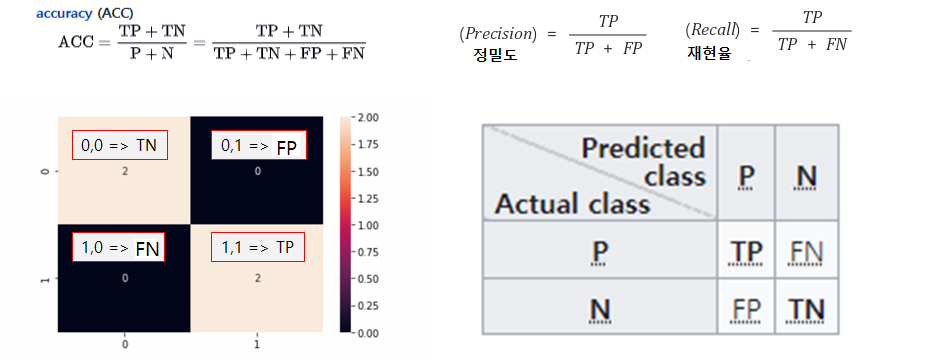

[[2 0]
 [0 2]]


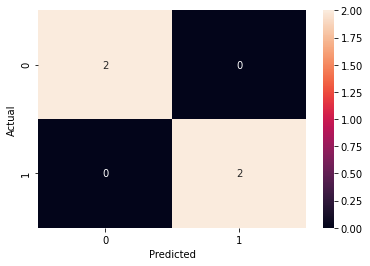

In [20]:
# 혼합행렬
from sklearn.metrics import confusion_matrix
y_predict = model.predict(x_test)
cm = confusion_matrix(y_test, y_predict) # 실제 y값, y 예측값
print(cm)

import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(cm, annot=True) # 세로축 : 관찰값(행), 가로축 : 예측값(열)
#sns.heatmap(cm, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [15]:
# 데이터분석과 관련한 필기 시험 보시는분들은 이 공식 모두 알아야함.
# 정확도:    실제데이터와 예측데이터가 같은 갯수 / 전체데이터
# cm[0][0] 은 (TN+TP)/(TN+FN+FP+TP)
accuracy_score = (cm[0][0] + cm[1][1]) / (cm[0][0] + cm[0][1] + cm[1][0] + cm[1][1]) #정확도
print(accuracy_score) #1.0


# 재현율: 실제 데이터가 true인 것중에 모델이 true라고 예측한 비율
recall_score = (cm[1][1]) / (cm[1][0]+cm[1][1]) 
print(recall_score) 


#정밀도
precision_score = (cm[1][1]) / (cm[0][1] + cm[1][1])
print(precision_score)

# F1 Score : 2*(정밀도*재현율)/(정밀도+재현율)
f1_score = ((precision_score * recall_score) / (precision_score + recall_score)) * 2
print(f1_score)

1.0
1.0
1.0
1.0


In [21]:
# https://wikidocs.net/87235
# 분류분석 보고서
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predict)) # 주로 1에대한 정밀도와 재현율을 확인!

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



## 값의 연관성 확인
- (보통) summary에 보이는 p-value값이 0.05보다 크면 x값에서 제거함.
- p-value값이 0.05보다 작아야 유효한 변수
- https://wikidocs.net/87222

In [22]:
import statsmodels.api as sm
logit_mod = sm.Logit(y_train, x_train)
results = logit_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.483183
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                    8
Model:                          Logit   Df Residuals:                        6
Method:                           MLE   Df Model:                            1
Date:                Tue, 14 Sep 2021   Pseudo R-squ.:                  0.2696
Time:                        16:02:18   Log-Likelihood:                -3.8655
converged:                       True   LL-Null:                       -5.2925
Covariance Type:            nonrobust   LLR p-value:                   0.09114
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0800      0.583      0.137      0.891      -1.063       1.223
x2             0.1752      0.538      0.326      0.744      -0.879       1.229
==============================================================================
"""

## ROC 커브곡선
- 이항분류에서 일치율을 시각화한 것
- ROC의 하단면적을 AUC라고 함. **AUC가 클수록 좋은 결과**임
- **이항분류에서만** 가능, 다항분류에서 사용 불가능
-  True Positive Rate와 False Positive Rate 두 가지를 이용해서 표현
- (참고) https://angeloyeo.github.io/2020/08/05/ROC.html<br>
<img src="https://raw.githubusercontent.com/angeloyeo/angeloyeo.github.io/master/pics/2020-08-05-ROC/pic1.png" width="300" height="300"></img>

## 로지스틱회귀 실습
- y값: admit(합격1, 불합격 0)
- x값
 - gre: 점수
 - gpa:학점평균
 - prestige: 출신학교(1이 가장 좋은 학교, 4가 가장 않좋은 학교)
 - 출신학교의 1,2,3,4는 일종의 카테고리(그룹항목) : 이러한 그룹항목은 범주형자료임 => 더미변수화를 작업해야함, 일부에서는 이 작업을 원핫인코딩이라고 하기도함

In [23]:
from google.colab import drive
drive.mount('/content/mnt')

Mounted at /content/mnt


In [24]:
f = '/content/mnt/MyDrive/데이터/판다스데이터분석_실습/로지스틱회귀분석'

In [26]:
df = pd.read_csv(f'{f}/admissions.csv')
df.head()

,admit,gre,gpa,prestige
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [27]:
# 더미변수화
df[['prest_1', 'prest_2', 'prest_3', 'prest_4']] = pd.get_dummies(df['prestige'])
df.head()

,admit,gre,gpa,prestige,prest_1,prest_2,prest_3,prest_4
0,0,380,3.61,3,0,0,1,0
1,1,660,3.67,3,0,0,1,0
2,1,800,4.00,1,1,0,0,0
3,1,640,3.19,4,0,0,0,1
4,0,520,2.93,4,0,0,0,1


In [28]:
df['intercept'] = 1
# sm.Logit(y,x)
logit_mod = sm.Logit(df['admit'], df[['intercept', 'gre', 'gpa', 'prest_2', 'prest_3', 'prest_4']]) # 더미변수는 보통 k-1개 사용
result = logit_mod.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.573854
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  admit   No. Observations:                  397
Model:                          Logit   Df Residuals:                      391
Method:                           MLE   Df Model:                            5
Date:                Tue, 14 Sep 2021   Pseudo R-squ.:                 0.08166
Time:                        16:27:08   Log-Likelihood:                -227.82
converged:                       True   LL-Null:                       -248.08
Covariance Type:            nonrobust   LLR p-value:                 1.176e-07
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -3.8769      1.142     -3.393      0.001      -6.116      -1.638
gre            0.0022      0.001      2.028      0.043    7.44e-05       0.004
gpa            0.7793      0.333      2.344      0.019       0.128       1.431
prest_2       -0.6801      0.317     -2.146      0.032      -1.301      -0.059
prest_3       -1.3387      0.345     -3.882      0.000      -2.015      -0.663
prest_4       -1.5534      0.417     -3.721      0.000      -2.372      -0.735
==============================================================================
"""

In [31]:
# gpa의 2.180027 는 gpa가1 증가할때 합격할 오즈가 2.1배 증가한다.
# prest_2의 0.506548 는 베이스라인 1등급고등학교에 비해서 합격할 오즈가 0.5배이다.
np.exp(result.params)

intercept    0.020716
gre          1.002221
gpa          2.180027
prest_2      0.506548
prest_3      0.262192
prest_4      0.211525
dtype: float64